In [1]:
from collections import defaultdict
import csv

def parse_results(directory):
    results = defaultdict(list)
    with open("/home/stephanie/ray-fork/results/{}/lease-reconstructions2.csv".format(directory), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            lease = float(row['lease'])
            num_reconstructions = float(row['num_reconstructions'])
            num_submitted = float(row['num_submitted'])
            results[lease].append(num_reconstructions / num_submitted * 100)
    return results

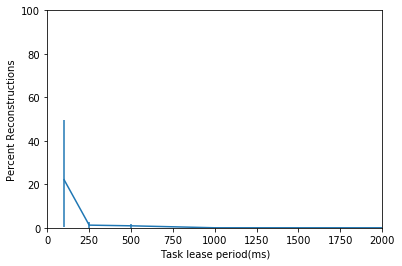

In [5]:
import matplotlib.pyplot as plt
import numpy as np

DIRECTORY = "results-lease"
results = parse_results(DIRECTORY)
lease_times = sorted(results.keys())
means = []
yerr_low = []
yerr_high = []
for tick in lease_times:
    mean = np.mean(results[tick])
    means.append(mean)
    yerr_low.append(
        mean - np.quantile(results[tick], 0.025)
    )
    yerr_high.append(
        np.quantile(results[tick], 0.975) - mean
    )

plt.errorbar(lease_times, means, yerr=[yerr_low, yerr_high])
plt.xlabel("Task lease period(ms)")
plt.ylabel("Percent Reconstructions")
plt.ylim(0, 100)
plt.xlim(0, 2000)

plt.show()
# plt.savefig("/home/stephanie/ray-fork/results/{}/lease-reconstructions2.pdf".format(DIRECTORY))